In [1]:
%matplotlib inline
import math
import numpy as np
from matplotlib import pyplot as plt

# Homework

0) Finish the implementation of false positon method. Use it to find the solution for $\sin(x) + 1 = x$ do it 20 times.

In [2]:
def f(x):
    return math.sin(x) + 1 - x

ran = [0, 2]

for k in range(20):
    grad = (f(ran[1]) - f(ran[0])) / (ran[1] - ran[0])
    y_int = f(ran[1]) - ran[1] * grad
    new_x = - y_int / grad
    ran = [new_x] + [i for i in ran if f(i) * f(new_x) < 0]

print(new_x)

1.934563210752024


1) Give me the solution to $x = e^{-x}$ that is $10^{-6}$ using bisection method.

Pick the initial bound from the following and explain why you can't pick the other one.
Bound A: (-1,0), Bound B (0,1)

In [3]:
# You have to pick bound (0, 1)
# Since in the bound (-1, 0) the function may be all negative since f(-1) is negative and f(0) is also negative 

def g(x):
    return x - (math.e ** -x)

ran2 = [0, 1]
mid = sum(ran2) / 2

while (max(ran2) - min(ran2)) / 2 > 1e-6:  # Loops until error is lower than required
    ran2 = [mid] + [i for i in ran2 if g(i) * g(mid) < 0]
    mid = sum(ran2) / 2

print(mid)

0.567143440246582


2) Find all value of $x \in [0,1]$ such that $f(x)=0$ for

$f(x) = -0.000216747 + 0.0072868 x - 0.0977383 x^2 + 0.664685 x^3 - 
 2.40773 x^4 + 4.46766 x^5 - 3.7091 x^6 + x^7$
 
Make sure your answers are at most $10^{-6}$ away from the real solution.

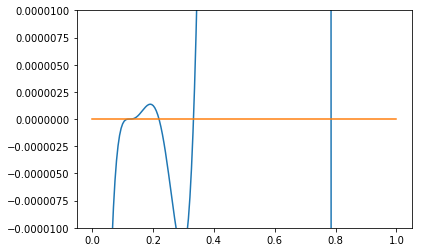

0.12216720581054687
0.22002792358398438
0.33329849243164056
0.7854087829589844


In [4]:
def f(x):
    return -0.000216747 + 0.0072868*x - 0.0977383*x**2 + 0.664685*x**3 - \
            2.40773*x**4 + 4.46766*x**5 - 3.7091*x**6 + x**7

plt.plot(np.linspace(0, 1, 200), [f(x) for x in np.linspace(0, 1, 200)])
plt.plot([0, 1], [0, 0])
plt.ylim(-0.00001, 0.00001)
plt.show()

# The graph shows that there are 4 places in the interval where f(x) = 0
# Repeat approximation method 4 times for different intervals which covers each of the solutions

def solution(func, ran):
    
    mid = sum(ran) / 2
    
    while (max(ran) - min(ran)) / 2 > 1e-6:  # Loops until error is lower than required
        ran = [mid] + [i for i in ran if f(i) * f(mid) < 0]
        mid = sum(ran) / 2
    
    return mid

print(solution(f, [0, 0.2]))
print(solution(f, [0.2, 0.3]))
print(solution(f, [0.3, 0.4]))
print(solution(f, [0.7, 0.8]))

2.1) Find all the local minima and maxima of the above function. How do you figure out whether it is a local maximum or local minimum

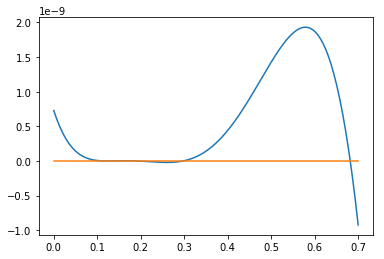

maximum 0.19136718697856925
minimum 0.2970912642268877
maximum 0.6817804716976527


In [5]:
def df(x):
    return f(x + 1e-7) - f(x)

# Graph of df(x)
plt.plot(np.linspace(0, 0.7, 200), [df(x) for x in np.linspace(0, 0.7, 200)])
plt.plot([0, 0.7], [0, 0])
plt.show()

# For the local min/max, df at that point must be about zero

def local_m(ran, df):
    
    while abs(ran[0] - ran[1]) > 1e-6:
        grad = (df(ran[1]) - df(ran[0])) / (ran[1] - ran[0])
        y_int = df(ran[1]) - ran[1] * grad
        new_x = - y_int / grad
        ran = [new_x] + [i for i in ran if df(i) * df(new_x) < 0]
    
    return sum(ran) / 2

def d_test(i, df):  # Test to see if maximum, minimum or inflection
    if df(i - 1e-5) * df(i + 1e-5) < 0:
        if df(i - 1e-5) > 0:
            return "maximum"
        else:
            return "minimum"
    else:
        return "inflection"

# The local minimum/maximum
l1 = local_m([0, 0.2], df)
l2 = local_m([0.2, 0.4], df)
l3 = local_m([0.4, 0.8], df)

print(d_test(l1, df), str(l1))
print(d_test(l2, df), str(l2))
print(d_test(l3, df), str(l3))

2.2) What is the `global maximum` and `global minimum` of the function above within the range $x\in[0,1]$

In [6]:
poss_values = [f(0), f(l1), f(l2), f(l3), f(1)]

print("global max = " + str(max(poss_values)))
print("global min = " + str(min(poss_values)))

global max = 0.0038258083219746414
global min = -0.07515324699999937


3) In quantum physics, when finding a bound state for a finite potential well one would end up with the following equation(Yes E is negative):

$$
\sqrt{\frac{-E}{E+V_0}} = \tan \sqrt{2m \frac{E+V_0}{\hbar^2} a}
$$

The goal is to find all Energy($E$) that satisfy this equation.
For simplicity, let
- $V_0 = 1$
- $m = 1$
- $a = 1$
- $\hbar = 1$(Yes this is called natural unit)

$$
    \sqrt{\frac{-E}{E+1}} = \tan \sqrt{2(E+1)}
$$

Find the value for $E\in (-1.0, 0)$ which satisfy the equation above). Make sure you accuracy is $<\pm10^{-4}$


1.934563210752024


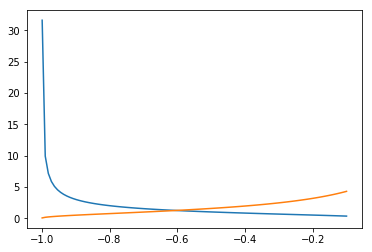

In [7]:
def f(x):
    return math.sqrt((-x)/(x+1))
def g(x):
    return math.tan(math.sqrt(2*(x + 1)))

xs = np.linspace(-0.999,-0.1, 100)
fx = [f(x) for x in xs]
gx = [g(x) for x in xs]
plt.plot(xs,fx)
plt.plot(xs,gx)

##########

# I'll use the secant method because I'm lazy to differentiate, and so are you (probably)

def h(x):
    return f(x) - g(x)

en_r = [0, -0.99] # letting lower bound start at -0.99 because otherwise the square root causes error

while abs(en_r[-1] - en_r[-2]) > 1e-4:
    grad = (h(en_r[-1]) - h(en_r[-2])) / (en_r[-1] - en_r[-2])
    y_int = h(en_r[-1]) - en_r[-1] * grad
    en_r.append(- y_int / grad)

print(new_x)

4) Ply quit programming and decide to be a Apple(fruit) shop owner. He bought 1000 apples everyday and try to sell it. The probability $k$ customer want Ply's apple(one each) is given by Poisson distribution:

$$
    P(k; \lambda) = \frac{\lambda^k \exp(-\lambda)}{k!}
$$

Where $\lambda$ is an parameter that represent the mean of number of people that want Ply's apple each day.

After selling apples for 2000 days Ply found that his 1000 apples a day are sold out 600 days out of 2000 days.

The goal for this problem is to figure out how he should change the number of apples he bought in a day.

- In case you are curious https://en.wikipedia.org/wiki/Poisson_distribution. The true distribution of this selling apple process should be binomial distribution but with large enough customer and low enough probability of an individual buying an apple 

4.1) You may find that if you try to code poisson distribution directly. It will not work with large number.
$$
    P(k; \lambda) = \frac{\lambda^k \exp(-\lambda)}{k!}
$$

Explain briefly why python complains

In [8]:
import math
def bad_poisson(lmd, k):
    return pow(lmd,k)*math.exp(-lmd)/math.factorial(k)
# bad_poisson(1000,1000) # uncomment to see it breaks

# Because you'd have to do lmd**k which is 1000**1000 and python gets lazy

4.2) A very useful trick to avoid this problem is to take log and exponentiate. That is

$$
    P(k; \lambda) = \exp\left( \ln \left[ \frac{\lambda^k \exp(-\lambda)}{k!} \right] \right)
$$

First, show that
$$
    \ln(P(k; \lambda)) = (k \ln(\lambda)-\lambda)-\ln(k!)
$$



In [9]:
# The equation would be as above (I filled it in)

4.3) $\ln(k!)$ shows up everywhere in math. So most math library have `lgamma` function to compute this very fast.
For example,

`math.lgamma(5) == math.log(math.factorial(4))`

Your job for this problem is to implement $P(k; \lambda)$ using log-exp trick.

If you do it right, $P(k=1000; \mu=1000) \approx 0.0126146$

In [10]:
def poisson(k, lmb):
    return math.exp((k * math.log(lmb) - lmb) - math.lgamma(k + 1))

print(poisson(1000, 1000))

0.012614611348719664


4.4) Now here is the fun part. Suppose that $\lambda = 987.6$(this is not true). Find the probability that Ply will sell all his 1000 apples. (Remember if 2000 people want Ply's apple, he his apple will also be sold out). 

And No, summing up to infinity is not practical.

In [11]:
def sell_at_least(k, lmb):
    prob = 1
    for i in range(k):
        prob -= poisson(i, lmb)
    return prob

print(sell_at_least(1000, 987.6))

0.3507846581670564


4.5) Recall the information that

After selling apples for 2000 days Ply found that his 1000 apples a day are sold out 600 days out of 2000 days.

Find the value for $\lambda$ to a decent accuracy($<\pm 0.1$)

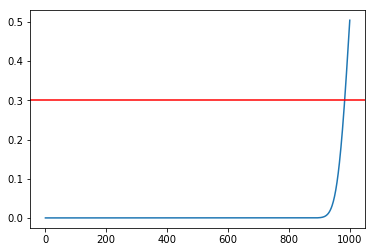

983.1784468601952


In [18]:
xs = np.linspace(1,1000, 1000)
plt.plot(xs, [sell_at_least(1000, x) for x in xs])
plt.axhline(y=0.3, color="red")
plt.show()

# Want to find lmb so that sell_at_least(1000, lmb) = 600/2000 = 0.3
# Using the secant method

guess_lst = [900, 1000]

while abs(guess_lst[-1] - guess_lst[-2]) > 0.01:
    
    def f(x):
        return sell_at_least(1000, x) - 0.3
    
    a = guess_lst[-1]
    b = guess_lst[-2]
    m = (f(a) - f(b)) / (a-b)
    c = f(a) - m * a
    guess_lst.append(-c/m)

lmb_0 = guess_lst[-1]
print(lmb_0)

4.6) Using $\lambda$ you found in 4.5).

Ply bounght apple for 20 Baht each and he sell it for 50 Baht each. Which means that for each apple he sells he make a profit of 30 baht. But, at the end of each day Ply has to trash all unsold Apples(taking a loss of 20 Baht each).

If Ply bought 1000 apples a day, what would be his expected profit(remember expected value from discrete math/stat/quantum?).

In [13]:
def apple_buy(x, lmb = lmb_0):
    
    run_out = 1  # Prob. of selling all the apples bought
    expected = 0
    
    for i in range(x):
        profit = 50 * i - 20 * x
        expected += profit * poisson(i, lmb)
        run_out -= poisson(i, lmb)
    
    expected += 30 * x * run_out
    
    return expected

print(apple_buy(1000))

28864.606145354872


4.7) Using $\lambda$ you found in 4.5) Find the number of apple Ply should buy in a day to maximize his expected profit.

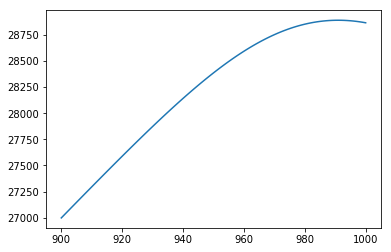

991.0


In [14]:
a_range = np.linspace(900, 1000, 101)
apples = [apple_buy(int(i)) for i in a_range]
plt.plot(a_range, [apple_buy(int(i)) for i in a_range])
plt.show()

for i in range(101):
    if apples[i] == max(apples):
        print(a_range[i])

5) Full Width at Half Maximum(FWHM). Distribution width is a very important quantity. It tells you how wide a the distribution is. One way to do that is to use a quantity called full-width half max.

This is the width of the distribution at half maximum. 

For example for distribution shown below the maximum is at x=0.0 and y=1.0

The maximum of this distribution is 1.0. So we are interested in the width of the distribution when the value of the distribution is 1.0/2=0.5

The width of the distribution is shown in black line. In this case it's about 2.35

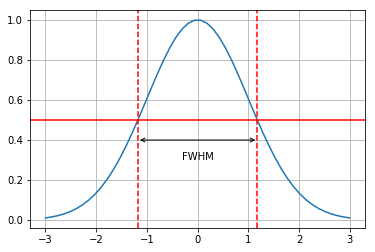

In [2]:
import math
def demo(x):
    return math.exp(-x**2/2.0)
x = np.linspace(-3,3)
y = [demo(xx) for xx in x]
plt.plot(x,y)
plt.axhline(0.5, color='red')

plt.axvline(2.355/2,color='red',linestyle='dashed')
plt.axvline(-2.355/2,color='red',linestyle='dashed')

plt.grid()
plt.annotate(
    '', xy=(-2.355/2, 0.4), xycoords='data',
    xytext=(2.355/2, 0.4), textcoords='data',
    arrowprops={'arrowstyle': '<->'})
plt.text(0,0.3,'FWHM',horizontalalignment ='center')

5.1)Find FWHM of the following function. Make sure the bound on error of the FWHM is less than $10^{-4}$.

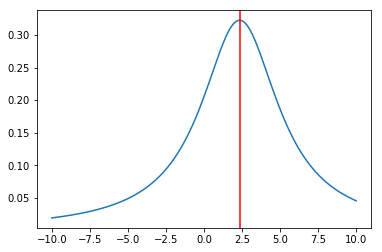

6.199994087219238


In [5]:
import math
def f(x, gamma):
    mu = 2.345
    return gamma/((x-mu)**2+gamma**2)
x = np.linspace(-10,10,200)
y = [f(xx, 3.1) for xx in x]
plt.plot(x,y)
plt.axvline(x = 2.345, color = "red")
plt.show()
print(fwhm(3.1))

5.2) Plot FWHM(y-axis) as a function of $\gamma$(gamma) from $\gamma=0.5\ldots 3$. Make sure you have at least 30 points.

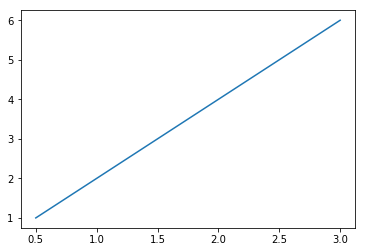

In [4]:
# print(f(1.0, gamma=0.2)) you may find this useful

def fwhm(gamma):
    
    # Maximum of the function is when x = mu = 2.345 (in this question)
    
    halfmax = f(2.345, gamma) / 2
    
    # Find points where function equals to halfmax
    
    def fn(x):
        return f(x, gamma) - halfmax
    
    def hm(ran):
        
        mid = sum(ran) / 2

        while (max(ran) - min(ran)) / 2 > 1e-5:  # Loops until error is lower than required
            ran = [mid] + [i for i in ran if fn(i) * fn(mid) < 0]
            mid = sum(ran) / 2
        
        return mid
    
    lower = hm([-2, 2])
    upper = hm([2.5, 7])
    
    return upper - lower

xx = np.linspace(0.5, 3)
yy = [fwhm(x) for x in xx]
plt.plot(xx, yy)
plt.show()

5.3) (Optional) Prove the relation you found in 5.2)

In [ ]:
# Too lazy to proof and type in latex
# But think you have to find the difference, approximate it using Taylor expansion and then show that the term is approx. linear